In [181]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from pathlib import Path
#import tensorflow as tf

# Import our input dataset
data = Path('./Data/merged_clean_3Years_df.csv')
original_df = pd.read_csv(data)
original_df

,reportedcity,dateofloss,elevationdifference,floodzone,latitude,longitude,numberoffloorsintheinsuredbuilding,occupancytype,originalconstructiondate,amountpaidonbuildingclaim,...,reportedzipcode,stns,obs,pred,stn_lat,stn_lon,new_date_column,geometry,rolling_2days_obs,rolling_7days_obs
0,NO CHATHAM,2/21/2015,999,AE,41.7,-70.0,3,1,1/1/1955,2618.18,...,2650,14281,0.38,0.000000,41.6875,-69.9933,2/21/2015,POINT (-69.9933 41.6875),3.800000e-01,1.680000e+00
1,NEW BRAUNFELS,10/30/2015,2,AE,29.7,-98.1,3,1,12/2/2003,3309.59,...,78130,526,10.62,9.319764,29.7221,-98.1311,10/30/2015,POINT (-98.1311 29.7221),1.062000e+01,2.208000e+01
2,NEW BRAUNFELS,10/30/2015,7,AE,29.7,-98.1,2,1,7/1/2003,0.00,...,78130,526,10.62,9.319764,29.7221,-98.1311,10/30/2015,POINT (-98.1311 29.7221),1.062000e+01,2.208000e+01
3,NEW BRAUNFELS,10/30/2015,0,C,29.7,-98.1,3,1,10/17/1998,67301.33,...,78132,526,10.62,9.319764,29.7221,-98.1311,10/30/2015,POINT (-98.1311 29.7221),1.062000e+01,2.208000e+01
4,NEW BRAUNFELS,10/30/2015,999,C,29.7,-98.1,3,3,7/1/1995,0.00,...,78130,526,10.62,9.319764,29.7221,-98.1311,10/30/2015,POINT (-98.1311 29.7221),1.062000e+01,2.208000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75656,HAMMOND,4/11/2014,999,A,44.5,-75.6,2,1,1/1/1976,0.00,...,13646,17787,0.00,0.000000,44.3768,-69.2616,4/11/2014,POINT (-69.2616 44.3768),8.220000e-13,1.120000e+00
75657,ARVERNE,1/8/2014,999,A05,40.6,-73.8,3,1,1/1/1920,0.00,...,11692,14209,0.10,0.343227,42.5420,-123.4260,1/8/2014,POINT (-123.426 42.542),4.600000e-01,4.600000e-01
75658,YORKTOWN HTS,6/8/2013,999,X,41.3,-73.8,4,1,4/1/1968,3198.97,...,10598,14262,8.64,6.556328,41.2664,-73.7975,6/8/2013,POINT (-73.7975 41.2664),1.042000e+01,1.205000e+01
75659,MC GREGOR,10/26/2013,999,X,31.5,-97.3,1,1,6/28/2000,12654.47,...,76657,1561,0.00,0.000000,30.6081,-97.0317,10/26/2013,POINT (-97.0317 30.6081),-2.410000e-14,1.110000e-13


In [182]:
#cleaning up last7_df
df = original_df.copy()

df["rolling_7days_obs"] = df["rolling_7days_obs"].round(2)


#convert date columns to datetime64[ns] 
df['dateofloss'] =  pd.to_datetime(df['dateofloss'], format='%m/%d/%Y', errors='ignore')
df["originalconstructiondate"] = df["originalconstructiondate"].apply(pd.to_datetime)
#df['originalconstructiondate'] =  pd.to_datetime(df['originalconstructiondate'], format='%m/%d/%Y', errors='ignore')

#merged_df.dtypes
#split the dates into sperate columns for dd, mm and yyyy
#split date of loss
df[['lossyear','lossmonth','lossday']] = df.dateofloss.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))

#split original construction date
df[['builtyear','builtmonth','builtday']] = df.originalconstructiondate.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))


#convert split columns to floats
df['lossyear'] = df['lossyear'].astype(float)
df['lossmonth'] = df['lossmonth'].astype(float)
df['builtyear'] = df['builtyear'].astype(float)

#age of the property at the time of loss
df['propertyage'] = df['lossyear'] - df['builtyear'] 

df["Payoff_Bin"] = pd.cut(df.amountpaidonbuildingclaim, bins=[0,1000,5000,10000,50000,3000000], include_lowest=True, labels=["0-1000","1001-5000","5001-10000","10001-50000","50000+"])

In [183]:
df_2015 = df.copy()

indexNames = df_2015[df_2015['lossyear'] < 2015 ].index
 
# Delete these row indexes from dataFrame
df_2015.drop(indexNames , inplace=True)

In [184]:
df_2015.dtypes

reportedcity                                  object
dateofloss                            datetime64[ns]
elevationdifference                            int64
floodzone                                     object
latitude                                     float64
longitude                                    float64
numberoffloorsintheinsuredbuilding             int64
occupancytype                                  int64
originalconstructiondate              datetime64[ns]
amountpaidonbuildingclaim                    float64
state                                         object
reportedzipcode                                int64
stns                                           int64
obs                                          float64
pred                                         float64
stn_lat                                      float64
stn_lon                                      float64
new_date_column                               object
geometry                                      

In [185]:
df = df_2015.copy()

In [186]:
#keeping chosen features and dropping all other columns from merged data

df = df.drop("amountpaidonbuildingclaim", axis=1)
df = df.drop("dateofloss", axis=1)
df = df.drop("elevationdifference", axis=1)
df = df.drop("latitude", axis=1)
df = df.drop("longitude", axis=1)
df = df.drop("numberoffloorsintheinsuredbuilding", axis=1)
df = df.drop("originalconstructiondate", axis=1)
df = df.drop("reportedcity", axis=1)
df = df.drop("lossyear", axis=1)
df = df.drop("lossday", axis=1)
df = df.drop("builtyear", axis=1)
df = df.drop("builtmonth", axis=1)
df = df.drop("builtday", axis=1)
df = df.drop("stn_lat", axis=1)
df = df.drop("stn_lon", axis=1)
df = df.drop("geometry", axis=1)
df = df.drop("new_date_column", axis=1)
df = df.drop("rolling_2days_obs", axis=1)
#df = df.drop("state", axis=1)
#df = df.drop("lossmonth", axis=1)
#df = df.drop("occupancytype", axis=1)

#dropping columns that might be providing redundant information
df = df.drop("obs", axis=1)
df = df.drop("pred", axis=1)
df = df.drop("stns", axis=1)


#df.head(3)
df_encoded = pd.get_dummies(df, columns=["floodzone", "lossmonth", "occupancytype", "state"])
#df_encoded = pd.get_dummies(df, columns=["floodzone", "occupancytype", "lossmonth", "state"])

In [187]:
df.head(3)

,floodzone,occupancytype,state,reportedzipcode,rolling_7days_obs,lossmonth,propertyage,Payoff_Bin
0,AE,1,MA,2650,1.68,2.0,60.0,1001-5000
1,AE,1,TX,78130,22.08,10.0,12.0,1001-5000
2,AE,1,TX,78130,22.08,10.0,12.0,0-1000


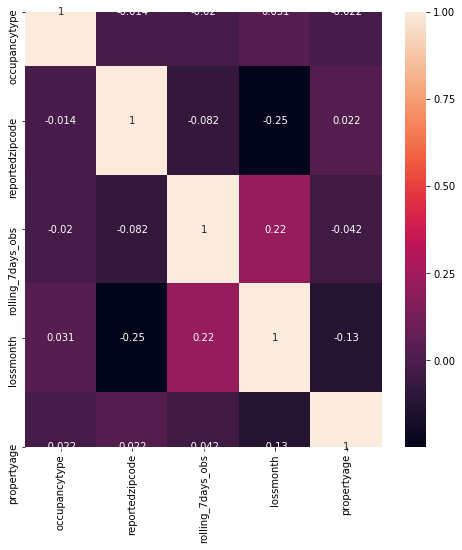

In [188]:
import matplotlib.pyplot as plt
#generating a correlation matrix
corrMatrix = df.corr()
import seaborn as sn
fig, ax = plt.subplots(figsize=(8,8)) 

sn.heatmap(corrMatrix, annot=True, ax = ax)

In [189]:
#combining common floodzones
filter_zones_A = [col for col in df_encoded if col.startswith('floodzone_A')]
filter_zones_V = [col for col in df_encoded if col.startswith('floodzone_V')]

df_encoded["Zone A"] = df_encoded[filter_zones_A].sum(axis = 1, skipna = True)
df_encoded["Zone V"] = df_encoded[filter_zones_V].sum(axis = 1, skipna = True) 

df_encoded.rename(columns={"Zone A": "floodzone_A", "Zone V": "floodzone_V"})

,reportedzipcode,rolling_7days_obs,propertyage,Payoff_Bin,floodzone_A,floodzone_A01,floodzone_A02,floodzone_A03,floodzone_A04,floodzone_A05,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,floodzone_A,floodzone_V
0,2650,1.68,60.0,1001-5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,78130,22.08,12.0,1001-5000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,78130,22.08,12.0,0-1000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,78132,22.08,17.0,50000+,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,78130,22.08,20.0,0-1000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75651,29412,11.95,59.0,0-1000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
75652,29510,49.13,10.0,50000+,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
75653,29169,3.28,25.0,0-1000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
75654,31906,14.15,42.0,5001-10000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [190]:
df_encoded = df_encoded.drop(df_encoded[filter_zones_A], axis=1)
df_encoded = df_encoded.drop(df_encoded[filter_zones_V], axis=1)
#df_encoded.columns.tolist()

In [191]:
#df_encoded_withrain = df_encoded.copy()

indexNames = df_encoded[df_encoded['rolling_7days_obs'] < 0.5].index
 
# Delete these row indexes from dataFrame
df_encoded.drop(indexNames , inplace=True)

df_encoded.rolling_7days_obs.min()

0.5

In [192]:
y =df_encoded.copy()
X =df_encoded.copy()
X = X.drop("Payoff_Bin", axis=1)

# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y['Payoff_Bin'],
                                                   random_state=1)

# Train the Classifier

from sklearn.linear_model import LinearRegression


#random forest, neural networks with linear regression
model = LinearRegression() 
model.fit(X_train, y_train)



#import numpy as np
#df_pred = pd.DataFrame({'Actual Payoffs': y_test, 'Predicted Payoffs': y_pred})
#df_pred

ValueError: could not convert string to float: '50000+'

In [193]:
df["amountspaid"] = original_df["amountpaidonbuildingclaim"]
df

#df_over50K = df.copy()

,floodzone,occupancytype,state,reportedzipcode,rolling_7days_obs,lossmonth,propertyage,Payoff_Bin,amountspaid
0,AE,1,MA,2650,1.68,2.0,60.0,1001-5000,2618.18
1,AE,1,TX,78130,22.08,10.0,12.0,1001-5000,3309.59
2,AE,1,TX,78130,22.08,10.0,12.0,0-1000,0.00
3,C,1,TX,78132,22.08,10.0,17.0,50000+,67301.33
4,C,3,TX,78130,22.08,10.0,20.0,0-1000,0.00
...,...,...,...,...,...,...,...,...,...
75651,AE,1,SC,29412,11.95,11.0,59.0,0-1000,0.00
75652,A,1,SC,29510,49.13,10.0,10.0,50000+,78995.22
75653,A20,1,SC,29169,3.28,10.0,25.0,0-1000,0.00
75654,A,1,GA,31906,14.15,12.0,42.0,5001-10000,5779.26


4637

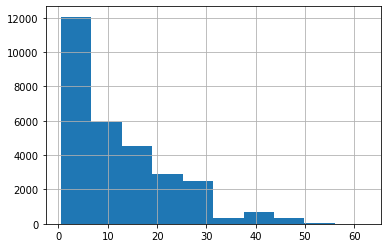

In [194]:
indexNames = df[df['rolling_7days_obs'] < 0.5].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

df.sort_values(by=['rolling_7days_obs'], inplace=True)
df.rolling_7days_obs.hist()

len(indexNames)

In [195]:
under1000 = df[df['amountspaid'] < 1000 ].index
under1000 = df[df['amountspaid'] < 1000 ].index
len(under1000)


8239

In [196]:
bins = df.groupby('Payoff_Bin') 

In [197]:
bins.get_group('0-1000') 

,floodzone,occupancytype,state,reportedzipcode,rolling_7days_obs,lossmonth,propertyage,Payoff_Bin,amountspaid
40126,A07,4,MA,2554,0.50,2.0,16.0,0-1000,1000.0
48806,AOB,1,TX,78332,0.50,10.0,33.0,0-1000,0.0
68354,AE,1,TX,77659,0.50,7.0,67.0,0-1000,0.0
64235,X,1,NE,68462,0.51,5.0,19.0,0-1000,0.0
41718,X,1,MS,39501,0.51,6.0,66.0,0-1000,0.0
...,...,...,...,...,...,...,...,...,...
57939,AO,1,SC,29150,57.48,10.0,42.0,0-1000,0.0
57937,AE,1,SC,29150,57.48,10.0,9.0,0-1000,0.0
55962,X,1,SC,29056,60.34,10.0,51.0,0-1000,0.0
55963,A,1,SC,29056,60.34,10.0,51.0,0-1000,0.0


In [198]:
bins.get_group('1001-5000')

,floodzone,occupancytype,state,reportedzipcode,rolling_7days_obs,lossmonth,propertyage,Payoff_Bin,amountspaid
29505,X,1,TX,77083,0.51,10.0,33.0,1001-5000,1057.65
37511,AH,1,IL,62205,0.51,6.0,65.0,1001-5000,3992.06
27097,AE,1,OR,97064,0.51,12.0,19.0,1001-5000,3289.55
27099,A,1,OR,97064,0.51,12.0,43.0,1001-5000,2634.49
47652,X,1,TX,79118,0.51,10.0,58.0,1001-5000,1191.73
...,...,...,...,...,...,...,...,...,...
51573,C,1,SC,29048,51.52,10.0,33.0,1001-5000,3884.81
56363,AE,1,SC,29527,51.77,10.0,20.0,1001-5000,4170.40
31910,AE,1,SC,29527,52.48,10.0,28.0,1001-5000,3003.21
31911,AE,1,SC,29527,52.48,10.0,24.0,1001-5000,2346.50


In [199]:
bins.get_group('5001-10000') 

,floodzone,occupancytype,state,reportedzipcode,rolling_7days_obs,lossmonth,propertyage,Payoff_Bin,amountspaid
18296,X,1,TX,77356,0.51,5.0,43.0,5001-10000,7251.44
27096,AE,1,OR,97064,0.51,12.0,91.0,5001-10000,5452.42
72281,AE,1,NE,68504,0.51,5.0,105.0,5001-10000,9936.69
36376,A07,1,SC,29401,0.51,10.0,75.0,5001-10000,9043.53
47113,AE,1,SC,29582,0.51,10.0,38.0,5001-10000,6694.53
...,...,...,...,...,...,...,...,...,...
56367,AE,1,SC,29527,51.77,10.0,23.0,5001-10000,7783.43
30302,X,1,SC,29510,51.94,10.0,19.0,5001-10000,6182.88
72504,AE,1,SC,29150,56.09,10.0,59.0,5001-10000,6766.59
60671,AE,1,SC,29150,57.36,10.0,61.0,5001-10000,5799.24


In [200]:
bins.get_group('10001-50000') 

,floodzone,occupancytype,state,reportedzipcode,rolling_7days_obs,lossmonth,propertyage,Payoff_Bin,amountspaid
36380,A07,1,SC,29401,0.51,10.0,88.0,10001-50000,13819.17
36381,AE,1,SC,29464,0.51,10.0,31.0,10001-50000,10306.82
47653,AE,1,TX,79015,0.51,10.0,41.0,10001-50000,20951.66
36378,A07,1,SC,29401,0.51,10.0,75.0,10001-50000,18920.22
27098,X,1,OR,97064,0.51,12.0,61.0,10001-50000,10950.42
...,...,...,...,...,...,...,...,...,...
28054,AE,1,SC,29150,55.88,10.0,37.0,10001-50000,42226.04
57938,X,1,SC,29153,57.48,10.0,46.0,10001-50000,12851.61
57935,AO,1,SC,29150,57.48,10.0,60.0,10001-50000,30782.47
57936,AO,2,SC,29150,57.48,10.0,50.0,10001-50000,34664.64


In [201]:
import numpy as np
import matplotlib.pyplot as plt

In [202]:
len(df.amountspaid.unique())

21258

In [203]:
#pd.value_counts(df['amountspaid']).plot.bar()

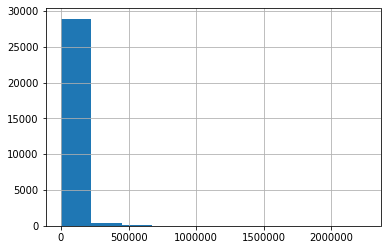

In [204]:
df["amountspaid"].hist()

In [205]:
unpaid = df[df['amountspaid'] <= 0.00 ].index

len(unpaid)

7166

In [206]:
9786-8557

1229/9786

0.12558757408542817

In [207]:
indexNames = df[df['amountspaid'] <=0.00 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

df

,floodzone,occupancytype,state,reportedzipcode,rolling_7days_obs,lossmonth,propertyage,Payoff_Bin,amountspaid
40126,A07,4,MA,2554,0.50,2.0,16.0,0-1000,1000.00
29505,X,1,TX,77083,0.51,10.0,33.0,1001-5000,1057.65
36380,A07,1,SC,29401,0.51,10.0,88.0,10001-50000,13819.17
36381,AE,1,SC,29464,0.51,10.0,31.0,10001-50000,10306.82
47653,AE,1,TX,79015,0.51,10.0,41.0,10001-50000,20951.66
...,...,...,...,...,...,...,...,...,...
57936,AO,2,SC,29150,57.48,10.0,50.0,10001-50000,34664.64
57934,AO,4,SC,29150,57.48,10.0,55.0,10001-50000,36330.29
47393,AE,1,SC,29526,60.66,10.0,25.0,1001-5000,2396.64
56355,A,1,SC,29526,60.66,10.0,22.0,50000+,88126.97


In [252]:
df = original_df

df_under2K = df[df["amountspaid"]<2000.00]

df_under2K

KeyError: 'amountspaid'

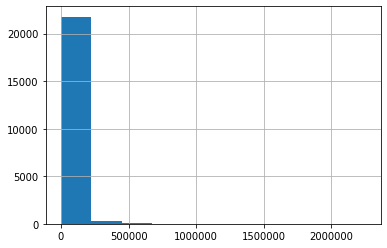

In [208]:
df["amountspaid"].hist()

In [213]:
bins = df.groupby('Payoff_Bin') 
df_under1K = bins.get_group('0-1000') 

In [215]:
df_under1K.amountspaid.min()

3.88

In [216]:
df_under1K.sort_values(by=['amountspaid'], inplace=True)

df_under1K

C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,floodzone,occupancytype,state,reportedzipcode,rolling_7days_obs,lossmonth,propertyage,Payoff_Bin,amountspaid
10832,AE,1,SC,29403,23.72,10.0,1.0,0-1000,3.88
35195,AO,1,TX,77060,17.85,5.0,55.0,0-1000,12.69
16051,X,1,GA,30214,8.58,11.0,32.0,0-1000,15.88
19766,AE,4,SC,29440,24.03,10.0,40.0,0-1000,18.27
33514,A06,1,WA,98272,2.68,11.0,24.0,0-1000,23.34
...,...,...,...,...,...,...,...,...,...
56342,A,1,LA,71457,6.04,6.0,3.0,0-1000,1000.00
44539,AE,1,LA,71115,3.81,6.0,4.0,0-1000,1000.00
69178,AE,1,PA,15037,3.05,3.0,105.0,0-1000,1000.00
38829,AE,1,IL,61356,2.76,5.0,103.0,0-1000,1000.00


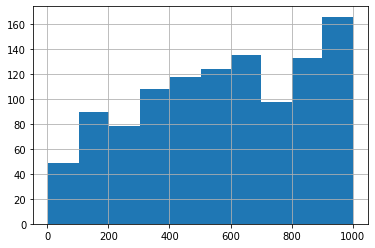

In [217]:
df_under1K.amountspaid.hist()

In [221]:
#df = df_encoded.copy()
df_encoded = pd.get_dummies(df_under1K, columns=["floodzone", "lossmonth", "occupancytype", "state"])
df_encoded


,reportedzipcode,rolling_7days_obs,propertyage,Payoff_Bin,amountspaid,floodzone_A,floodzone_A01,floodzone_A02,floodzone_A03,floodzone_A04,...,state_PA,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_WA,state_WV,state_WY
10832,29403,23.72,1.0,0-1000,3.88,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
35195,77060,17.85,55.0,0-1000,12.69,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16051,30214,8.58,32.0,0-1000,15.88,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19766,29440,24.03,40.0,0-1000,18.27,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
33514,98272,2.68,24.0,0-1000,23.34,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56342,71457,6.04,3.0,0-1000,1000.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44539,71115,3.81,4.0,0-1000,1000.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69178,15037,3.05,105.0,0-1000,1000.00,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
38829,61356,2.76,103.0,0-1000,1000.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
#combining common floodzones

df = df_encoded.copy()

filter_zones_A = [col for col in df if col.startswith('floodzone_A')]
filter_zones_V = [col for col in df if col.startswith('floodzone_V')]

df["Zone A"] = df[filter_zones_A].sum(axis = 1, skipna = True)
df["Zone V"] = df[filter_zones_V].sum(axis = 1, skipna = True) 

df.rename(columns={"Zone A": "floodzone_A", "Zone V": "floodzone_V"})

df = df.drop(df[filter_zones_A], axis=1)
df = df.drop(df[filter_zones_V], axis=1)


In [226]:
df_encoded = df_encoded.drop("Payoff_Bin", axis=1)

df_encoded

,reportedzipcode,rolling_7days_obs,propertyage,amountspaid,floodzone_A,floodzone_A01,floodzone_A02,floodzone_A03,floodzone_A04,floodzone_A05,...,state_PA,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_WA,state_WV,state_WY
10832,29403,23.72,1.0,3.88,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
35195,77060,17.85,55.0,12.69,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16051,30214,8.58,32.0,15.88,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19766,29440,24.03,40.0,18.27,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
33514,98272,2.68,24.0,23.34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56342,71457,6.04,3.0,1000.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44539,71115,3.81,4.0,1000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69178,15037,3.05,105.0,1000.00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
38829,61356,2.76,103.0,1000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
y =df_encoded.copy()
X =df_encoded.copy()
X = X.drop("amountspaid", axis=1)

# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y['amountspaid'],
                                                   random_state=1)

# Train the Classifier

from sklearn.linear_model import LinearRegression


#random forest, neural networks with linear regression
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [247]:
X_train.head()

,reportedzipcode,rolling_7days_obs,propertyage,floodzone_A,floodzone_A01,floodzone_A02,floodzone_A03,floodzone_A04,floodzone_A05,floodzone_A06,...,state_PA,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_WA,state_WV,state_WY
74106,98287,7.59,53.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48967,63386,7.01,41.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74064,65101,7.93,65.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22715,29577,21.60,65.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
28111,68504,2.74,53.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [248]:
y_train.head()

74106    1000.00
48967     398.71
74064     182.12
22715     471.96
28111     597.61
Name: amountspaid, dtype: float64

In [243]:
from sklearn.metrics import r2_score, mean_squared_error

In [244]:
r2_score(y_test, y_pred)

-0.07591393065871155

In [246]:

mean_squared_error(y_test, y_pred)

88373.79390783455

In [245]:
y_pred = model.predict(X_test)

score_paid= model.score(X_test, y_test)
print (score_paid)


import numpy as np
df_paidpred = pd.DataFrame({'Actual Payoffs': y_test, 'Predicted Payoffs': y_pred})
df_paidpred

-0.07591393065871155


,Actual Payoffs,Predicted Payoffs
26090,777.91,588.765982
71935,498.88,572.837483
44302,973.05,594.726293
20056,686.00,574.429535
6883,806.78,596.363407
...,...,...
21797,923.84,608.573090
19896,110.45,287.740500
75160,527.57,628.872233
11727,426.24,520.080770


In [233]:
y_pred.shape

(275,)

In [234]:
y_test.shape

(275,)

In [235]:
X_test.shape

(275, 96)